In [184]:
import pickle
import os
from notebook_utils import plot_dendogram_and_tsne
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Variance PCA: 0.8578270673751831


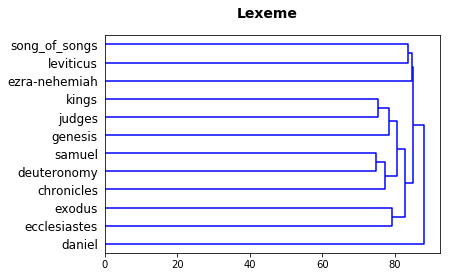

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.002s...
[t-SNE] Computed neighbors for 768 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 2.487410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.517937
[t-SNE] KL divergence after 1000 iterations: 0.937881


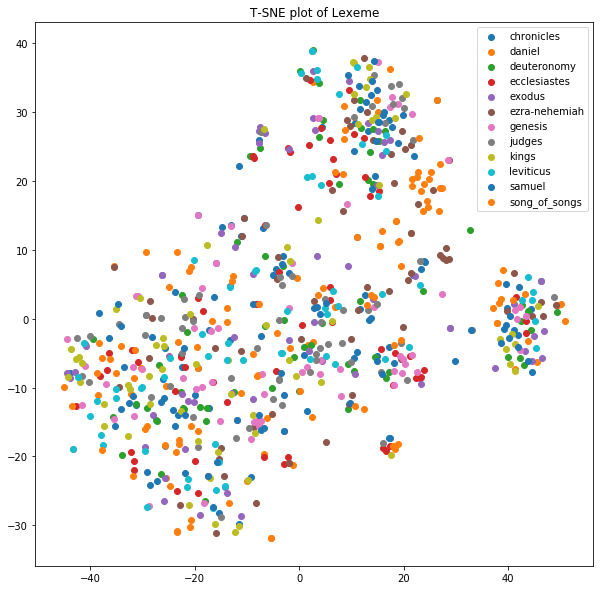

In [2]:
path = os.path.join('..', 'data', 'hidden_states', 'lexeme_lstm_512_seq_len_32.pkl')

with open(os.path.join(path), 'rb') as f:
    hiddens = pickle.load(f)

plot_dendogram_and_tsne(hiddens, 'Lexeme', pca_components=170)

# Shap

In [56]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [202]:
import shap
feature_type = 'lexeme'
lstm_dim = 512
character_level = False
main_dir = '..'
batch_size = 1
seq_len = 32
import sys
sys.path.append('..')
from log import logger
from utils import lstm_model, Tokenizer, get_texts, DataGenerator
import pickle
import shap
import os

In [203]:
file_path = os.path.join(main_dir, 'models',
                         f'{feature_type}_lstm_{lstm_dim}')

texts = get_texts(main_dir, feature_type, character_level)
tokenizer = Tokenizer(texts.values(), character_level=character_level)
test_generator = DataGenerator(tokenizer,
                               tokenizer.full_text,
                               seq_len=seq_len,
                               batch_size=batch_size,
                               with_embedding=True,
                               train=False)


if character_level:
    file_path += '_character_level'

file_path += '.h5'

logger.info(f"Loading {file_path}")

prediction_model = lstm_model(num_words=tokenizer.num_words,
                              lstm_dim=lstm_dim,
                              seq_len=1,
                              batch_size=batch_size,
                              stateful=True,
                              return_state=False,
                             flatten=True)

prediction_model.load_weights(file_path)


root - INFO - Full text sample: אדם שׁת אנושׁ קינן מהללאל ירד חנ
root - INFO - Length of tokenizer: 4775
root - INFO - Setting up testing generator...
root - INFO - Length of encoded texts: 235679
root - INFO - Number of sequences: 47129
root - INFO - Loading ../models/lexeme_lstm_512.h5


In [142]:
file_name = f'{feature_type}_lstm_{lstm_dim}_seq_len_{seq_len}'
if character_level:
    file_name += '_character-level'
file_name += '.pkl'

path_out = os.path.join('../data', 'seeds', file_name)
with open(path_out, 'rb') as f:
    seeds = pickle.load(f)


In [143]:
from lime.lime_text import LimeTextExplainer

explainer = LimeTextExplainer(class_names=list(tokenizer.word_to_ix.keys()))


In [144]:
import numpy as np

samples = {}

for book in texts:
    len_text = len(texts[book]) if character_level else len(texts[book].split())
    rand_idx = np.random.randint(0, len_text - seq_len, batch_size)

    if character_level:
        samples[book] = tokenizer.encode([texts[book][i: i + seq_len] for i in rand_idx])


In [145]:
rand_idx = np.random.randint(0, len_text - seq_len, batch_size)


In [146]:
rand_idx = np.random.randint(0, len_text - seq_len, batch_size)

if character_level:
    samples[book] = tokenizer.encode([texts[book][i: i + seq_len] for i in rand_idx])


In [197]:
import pickle

with open('../data/seeds/lexeme_lstm_512_seq_len_32.pkl', 'rb') as f:
    seed = pickle.load(f)

In [199]:
seed['genesis'].shape

(64, 32)

In [177]:
from tqdm.auto import tqdm

def predict_fn(text):
    
    
    X_in = tokenizer.encode(text, errors='ignore')
    
    print(len(X_in))
    
    predictions = np.empty([len(X_in), tokenizer.num_words])
    
    for i, x_in in enumerate(tqdm(X_in)):
        
        prediction_model.reset_states()
        for w in x_in:
            x = np.array(w)[np.newaxis]
            
            y_ = prediction_model.predict(x)
            
        predictions[i] = y_
            
        
        
    
    print(predictions.shape)
#     y_ = prediction_model.predict(X)
    
    return predictions
    
    

array([[4433, 1132,  553, ..., 4067, 1132, 4066],
       [ 248,  244, 2927, ..., 2552, 1041, 4595],
       [ 248, 1132, 3093, ..., 1132,  767, 1041],
       ...,
       [ 506, 1041, 2994, ..., 1739, 2053, 4297],
       [4406, 1132, 4206, ..., 1132, 1335, 2253],
       [  45, 2053,  328, ..., 1081, 2179,  473]])

In [204]:
text_sample = seeds['genesis']

In [193]:
len(text_sample.split())

32

In [194]:
texts['genesis'].split()[64]

'ו'

In [222]:
for sample in seeds['chronicles']:
    
    text = sample[:-1]
    label = sample[-1]
    text = tokenizer.decode(text)

    explanation = explainer.explain_instance(text, predict_fn, labels=(label,), num_samples=128)
    
    explanation.show_in_notebook()

128
128


(128, 4775)


128
128


/Users/david/miniconda2/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


KeyboardInterrupt: 

In [210]:
tokenizer.ix_to_word[1]

'אבד'

In [187]:
explanation.show_in_notebook()

In [215]:
np.array(texts.keys()).shape

()

In [243]:
from notebook_utils import explain_predictions

In [246]:
explain_predictions(seeds, prediction_model, tokenizer, num_lime_samples=128)



------------------------------

Explanations for chronicles


/Users/david/miniconda2/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


/Users/david/miniconda2/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


KeyboardInterrupt: 

In [237]:
def explain_predictions(seeds, model, tokenizer,
                        num_lime_samples=1024,
                        num_explanations_per_book=8):
    """Explains keras language model given a dictionary of encoded seeds.
    Parameters
    ----------
    seeds: dict
        Dictionary of keys (books) and seeds.
    model: keras.Model
        Keras classifier
    tokenizer: Tokenizer
        Tokenizer instance (see utils)
    num_lime_samples: int
        Number of samples to use in the lime algorithm.
    num_explanations_per_book: int
        How many explanations per book

    Returns
    -------
    Shows explanations in Jupyter notebook.
    """
    
    def _predict_fn(text):


        X_in = tokenizer.encode(text, errors='ignore')

        print(len(X_in))

        predictions = np.empty([len(X_in), tokenizer.num_words])

        for i, x_in in enumerate(tqdm(X_in)):

            prediction_model.reset_states()
            for w in x_in:
                x = np.array(w)[np.newaxis]

                y_ = prediction_model.predict(x)

            predictions[i] = y_




        print(predictions.shape)
    #     y_ = prediction_model.predict(X)

        return predictions

    
    for sample in seeds['chronicles']:
    
        text = sample[:-1]
        label = sample[-1]
        text = tokenizer.decode(text)

        explanation = explainer.explain_instance(text, _predict_fn, labels=(label,), num_samples=128)

        explanation.show_in_notebook()


In [238]:
explain_predictions(seeds, prediction_model, tokenizer)

128


(128, 4775)


128


/Users/david/miniconda2/envs/py36/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


KeyboardInterrupt: 